<span style="color:crimson;font-size:22px"><b> Background of UCI Heart Failure Dataset </b></span> 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The dataset is from the University of California Irvine Machine Learning Repository.

| Variable Name | Type | Description | Units |
|----------|:-----------|:-----------|:-----------|
|age|Integer|Age of the Patient|Years|
|anemia|Binary|Decrease of red blood cells or hemoglobin|
|creatinine_phosphokinase|Integer|Level of CPK enzyme in the blood|mcg/L|
|diabetes|Binary|Diabetes status of a patient|
|ejection_fraction|Integer|Portion of blood leaving the heart in each cardiac contraction|%|
|high_blood_pressure|Binary|Whether the patient has hypertension|
|platelets|Continuous|Count of platelets in the blood|kiloplatelets/mL|
|serum_creatinine|Continuous|Level of serum creatinine in the blood|mg/dL|
|serum_sodium|Continuous|Level of serum sodium in the blood|mEq/L|
|sex|Binary|Gender of patient|
|smoking|Binary|Whether the patient smokes or not|
|time|Integer|Follow-up period|days|
|death_event|Binary|Whether the patient died during the follow-up period|

<span style="color:crimson;font-size:22px"><b> Step 1: Summary of Data Structure </b></span>
### 1.1 Importing appropriate libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

### 1.2 Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 1.3 Summary Statistics



In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### 1.4 Histogram of each numerical feature

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

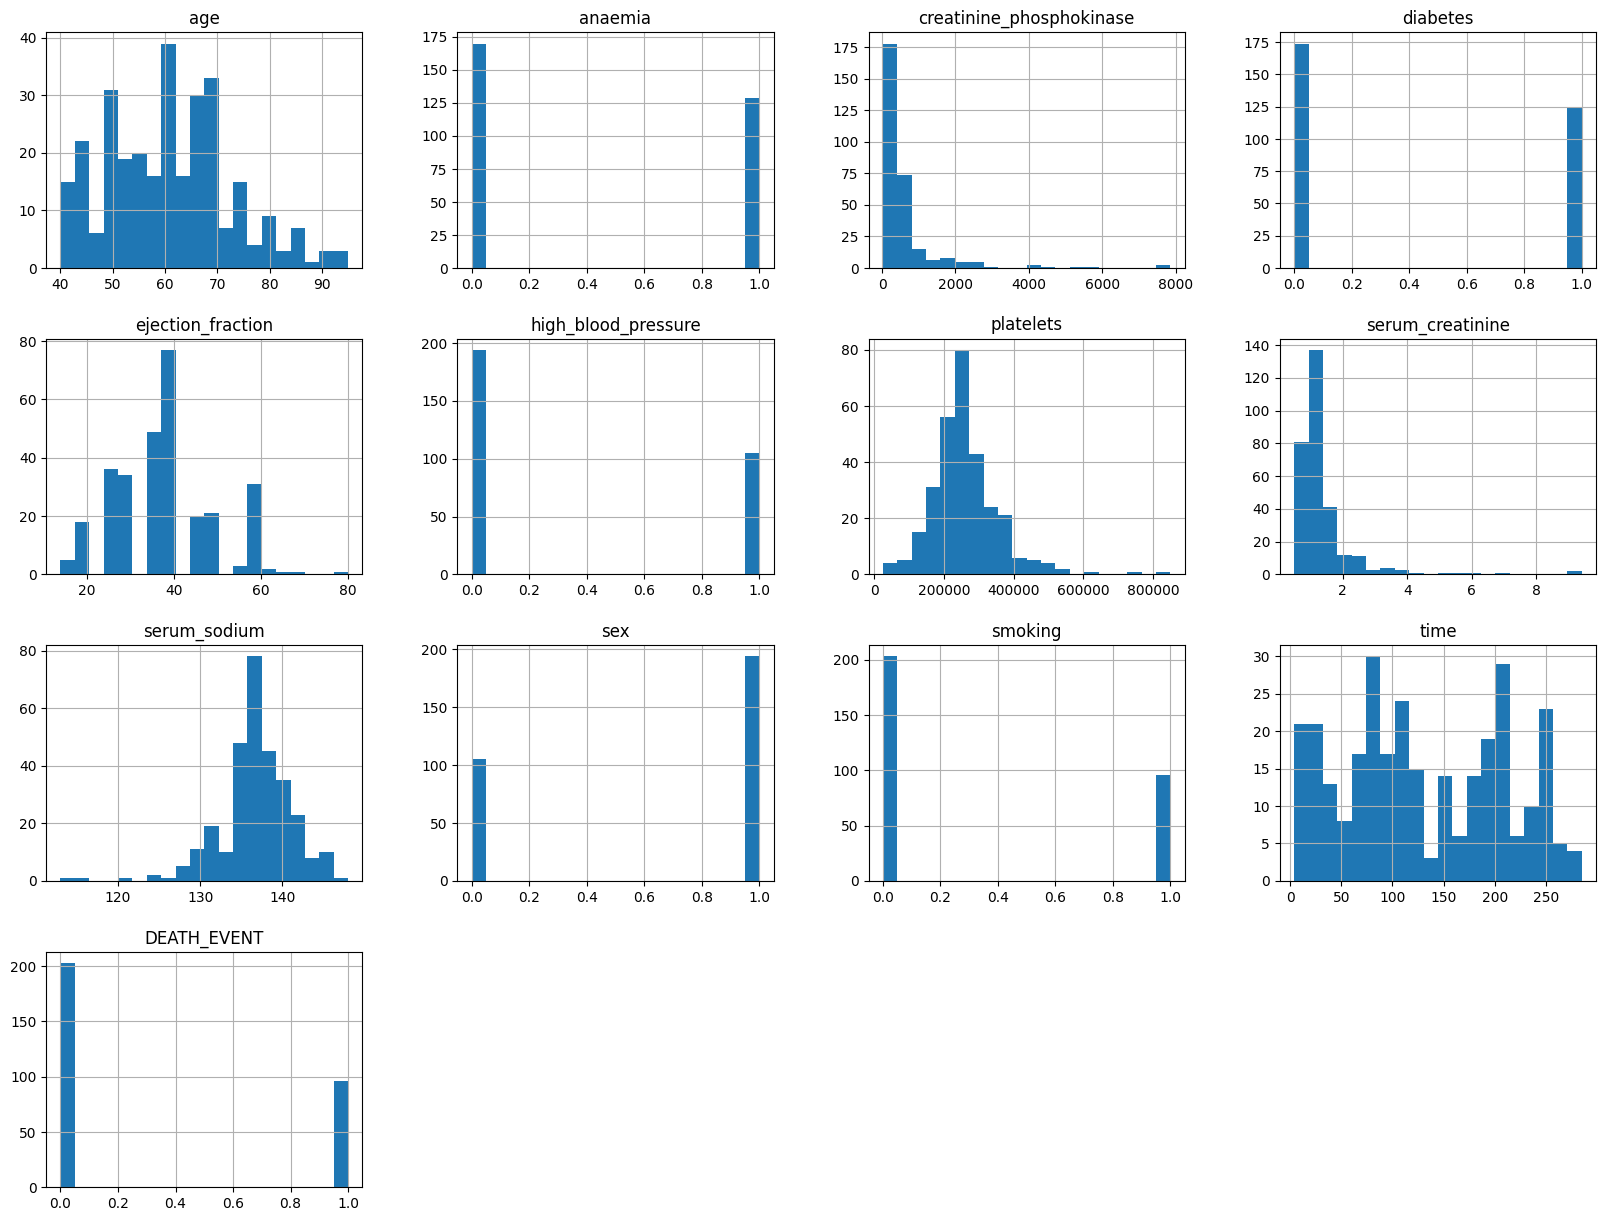

In [4]:
df.hist(bins = 20, figsize = (20, 15))

**Observation:**
* These attributes have very different scales so they should be treated with feature scaling.
* Some of the histograms are tail-heavy (such as creatinine_phosphokinase, serum_sodium, serum_creatinine). We may need to transform these attributes to have more bell-shaped distributions.

<span style="color:crimson;font-size:22px"><b> Step 2: Data Visualisation </b></span>
### 2.1 Splitting Data into Train and Test Sets

We will split the data into training and test sets and perform data analysis on only the training set to avoid data leakages.


In [5]:
X = df.drop(columns = "DEATH_EVENT")
y = df["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

Creating initial copy of training data (and test data) for data exploration and feature selection.

In [6]:
train_df = pd.concat([X_train, y_train], axis = 1)
test_df = pd.concat([X_test, y_test], axis = 1)

### 2.2 Distribution of the Target Variable

[Text(0, 0.5, 'Percentage')]

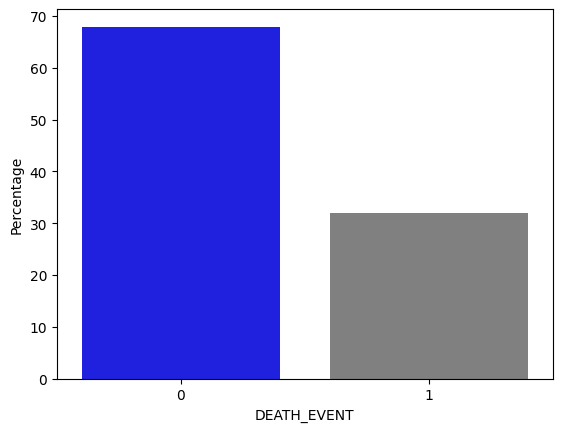

In [7]:
ax = sns.barplot(x = "DEATH_EVENT", y = "DEATH_EVENT", data = train_df, estimator = lambda x: len(x) / len(train_df) * 100, palette = ["blue", "grey"])
ax.set(ylabel = "Percentage")

**Comment:** There is a class imbalance , which will later be addressed using SMOTE technique.

In [8]:
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]

### 2.3 Visualising Correlation Matrix of Input Features

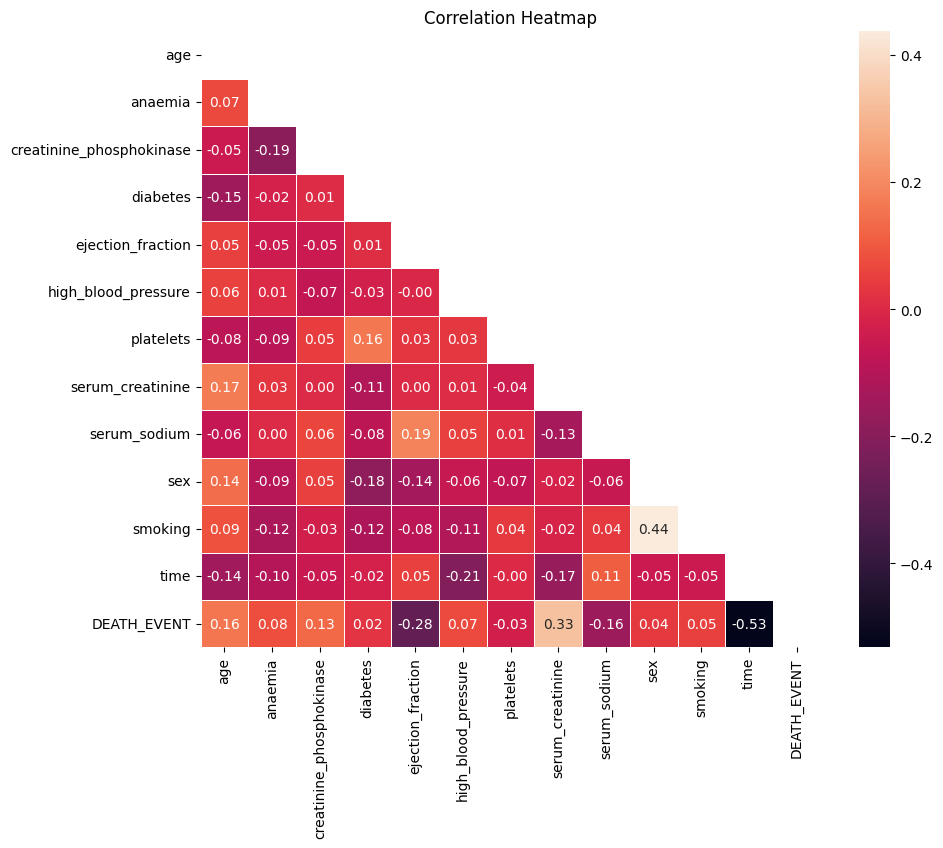

In [9]:
#corr_df = df.drop("DEATH_EVENT", axis = 1).corr()
corr_df = train_df.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(corr_df)
sns.heatmap(corr_df, mask = mask, linewidths = 0.5, annot = True, fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observations:**

* Features are uncorrelated with each other except there is a high positive correlation between sex and smoking.
* Time appears to be the most important feature in determining the DEATH_EVENT outcome. This makes sense as the longer it takes the patient to receive treatment, the higher the chances of a fatality (as apparent from the negative relationship between time and DEATH_EVENT)
* DEATH_EVENT does not seem linearly correlated with features such as anaemia, creatinine phosphokinase, diabetes, high blood pressure etc. (however, this does not mean there is no non-linear correlation)
* There is a high negative correlation between time and DEATH_EVENT (It seems that the longer the follow-up, the more likely the patient dies)
* ejection_fraction is negatively correlated on DEATH_EVENT, which is expected as the ejection_fraction reflects the heart efficiency
* serum_creatinine is also an important influence on DEATH_EVENT, as it represents how well the kidneys are filtering the waste from the blood, and makes the heart function better (positively correlated)
* Age is positively correlated with DEATH_EVENT, which makes sense as older individuals are more likely to suffer from a fatality.

**Limitation**: Correlation coefficients only capture linear relationships. There could still be non-linear relationships among the features themselves and the outcome class.

### 2.4 Plotting Distribution of Single Variables and Relationship between Variables

In [10]:
'''g = sns.pairplot(train_df,hue="DEATH_EVENT")
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.legend("DEATH_EVENT")
plt.plot()
'''

'g = sns.pairplot(train_df,hue="DEATH_EVENT")\nfor ax in g.axes.flat:\n    ax.tick_params(axis=\'both\', labelleft=True, labelbottom=True)\n    \nplt.subplots_adjust(wspace=0.3, hspace=0.3)\nplt.legend("DEATH_EVENT")\nplt.plot()\n'

**Comments:** 
* Regardless of age, patients who do not survive are mostly clustered towards the lower ejection fraction end (this makes sense as a lower ejection fraction means the blood pumps less efficiently) than those who survive. (**Age vs Ejection Fraction**) This is similarly reflected by the distribution of Ejection Fraction, where those that do not survive have a lower mean ejection fraction than those that survive.
* Patients who do not survive tend to have more extreme values of creatine phosphokinase (when looking at CPK plotted against all other features). This is reasonable as when CPK is high, this means that there is generally stress or injury to the heart, brain or skeletal muscle.
* Similar observation can be made for serum creatinine. There are more extreme values for serum creatinine for the patients do not survive. It is a metric on how well the patients' kidneys are working. High levels of serum creatinine mean that the kidneys are not working as well, and would potentially affect cardiovascular health
* Patients who do not survive tend to have less follow-up time than patients who do survive (clustered towards the lower end of time). This is reflected in multiple plots of time against other features.

### 2.5 Distributions of Numerical Features against Target Variable

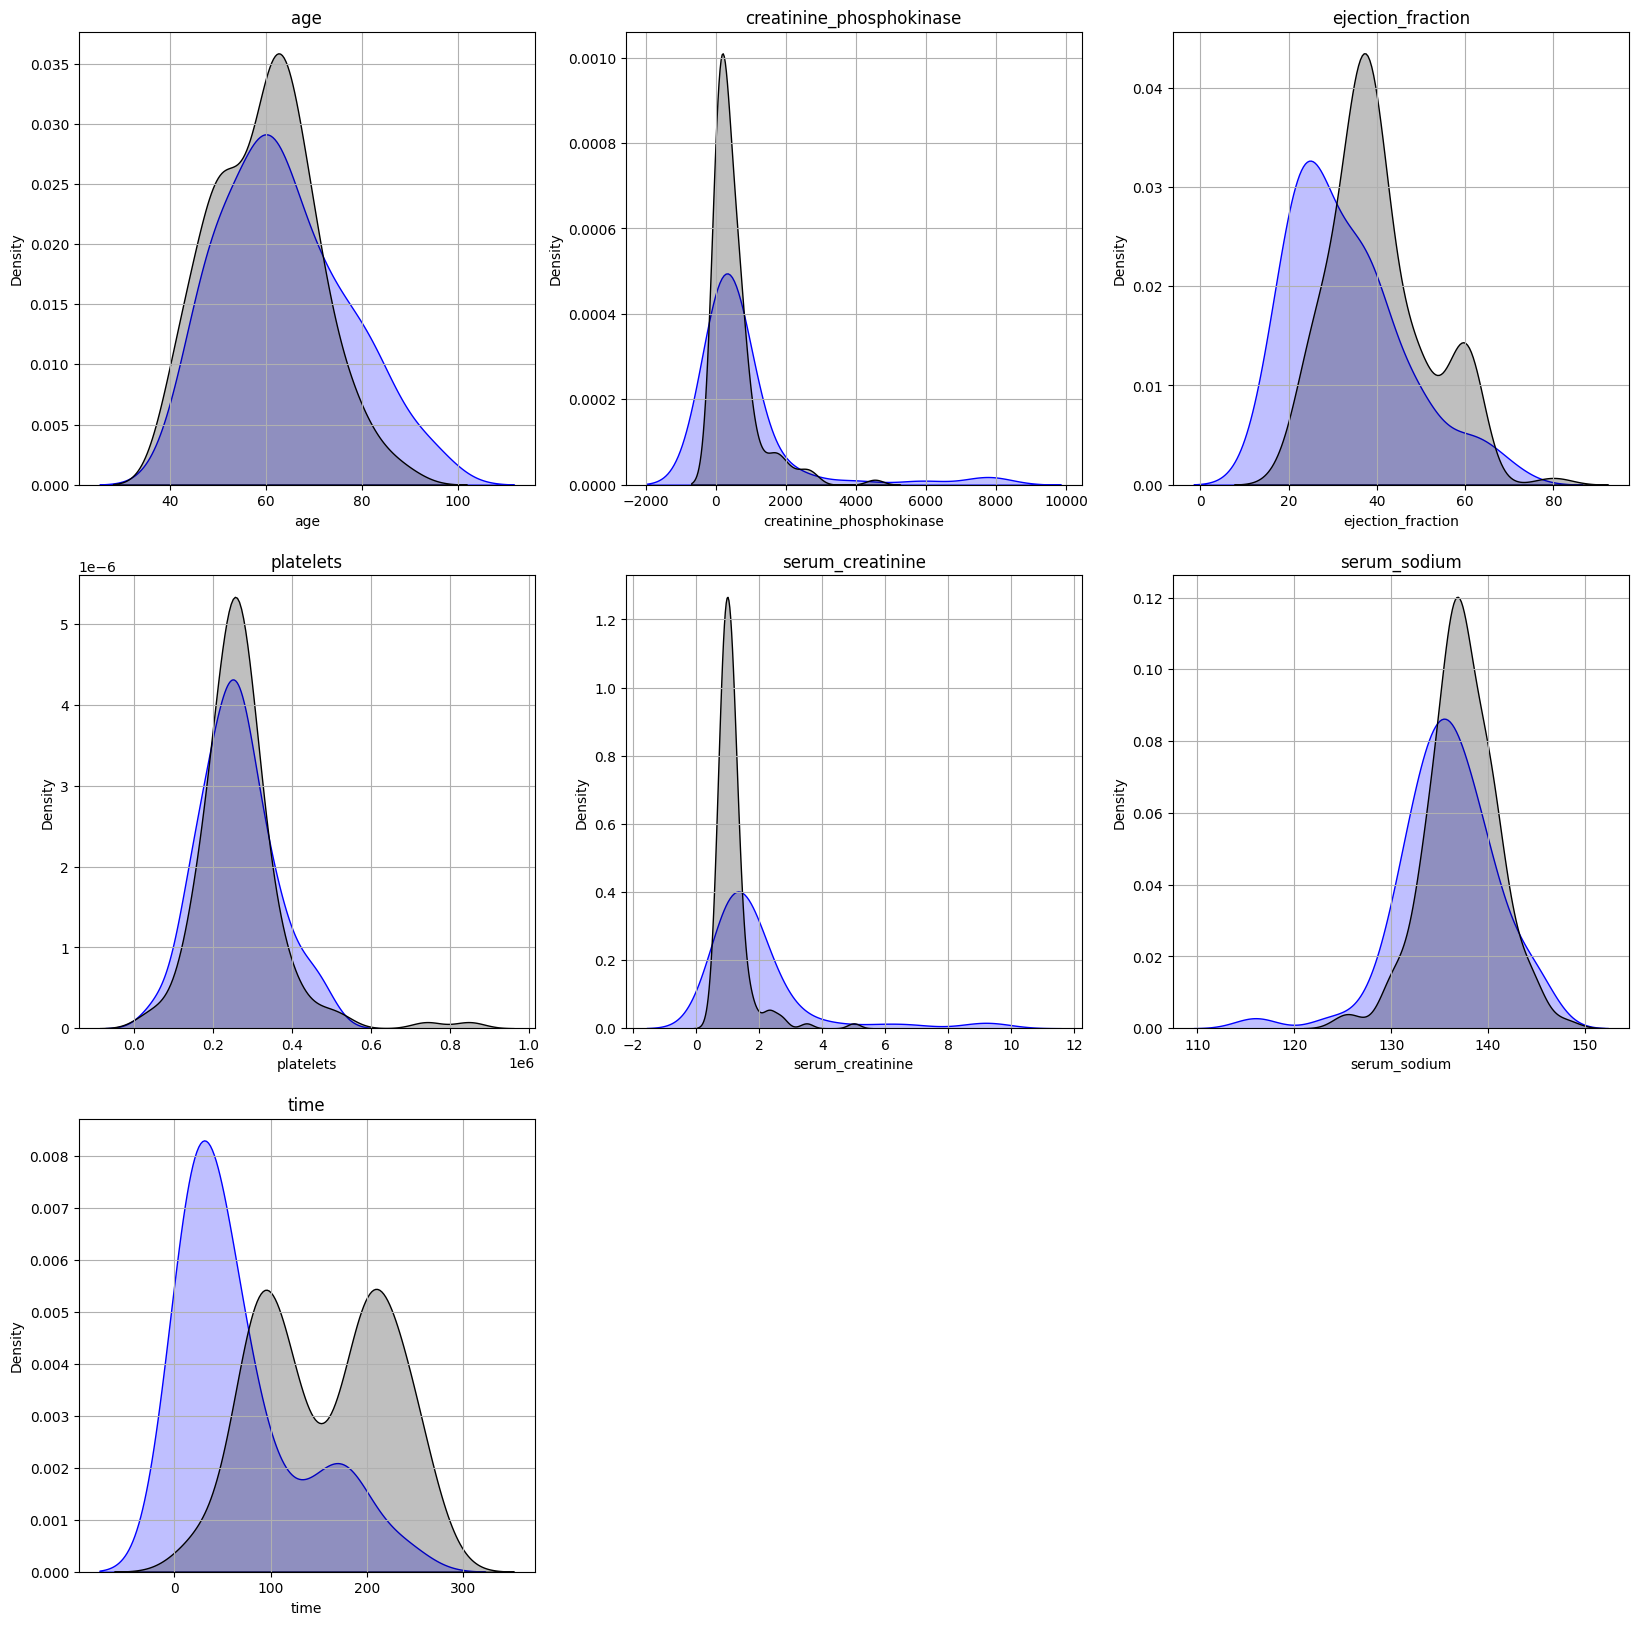

In [11]:
plt.figure(figsize = (20, 20))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(train_df.loc[train_df["DEATH_EVENT"] == 1, col], label = "survived", fill = True, color = "blue")
    sns.kdeplot(train_df.loc[train_df["DEATH_EVENT"] == 0, col], label = "death", fill = True, color = "black") 

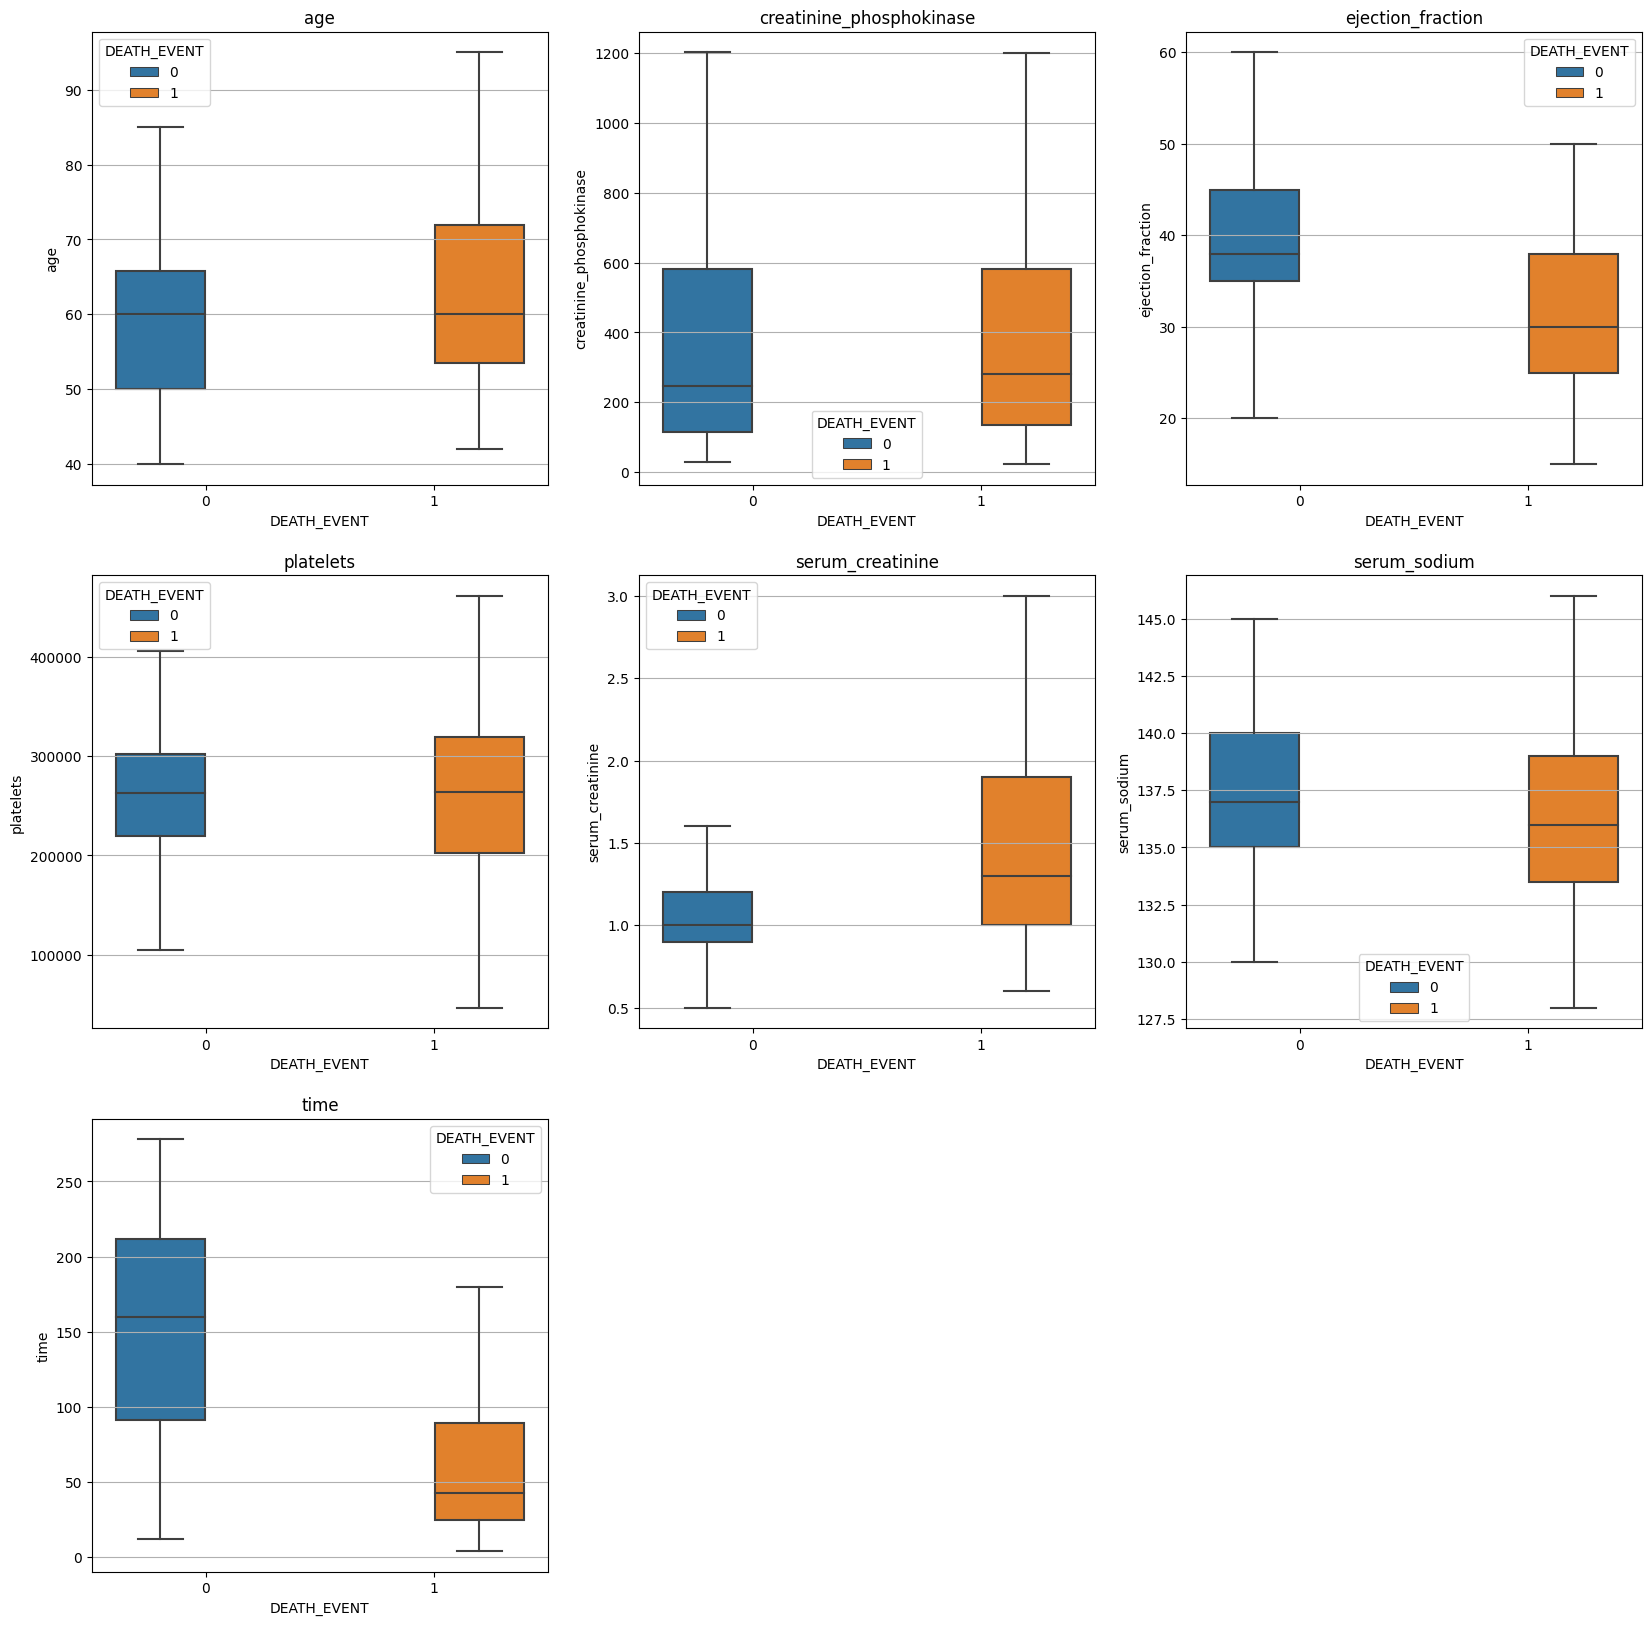

In [12]:
plt.figure(figsize = (20, 20))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.grid(True)
    plt.title(col)
    sns.boxplot(data = train_df, y = col, x = "DEATH_EVENT", hue = "DEATH_EVENT", showfliers = False)

**Comments:**

* The relative variability between the survival and death distribution is quite significant for input variables such as ejection_fraction and serum_creatinine, which indicates that they may contribute to predicting the labels. 

### 2.7 Detecting Outliers

There appears to be a significant number of outliers. These will not be removed nor capped as they may be useful indicators of the feature variable.

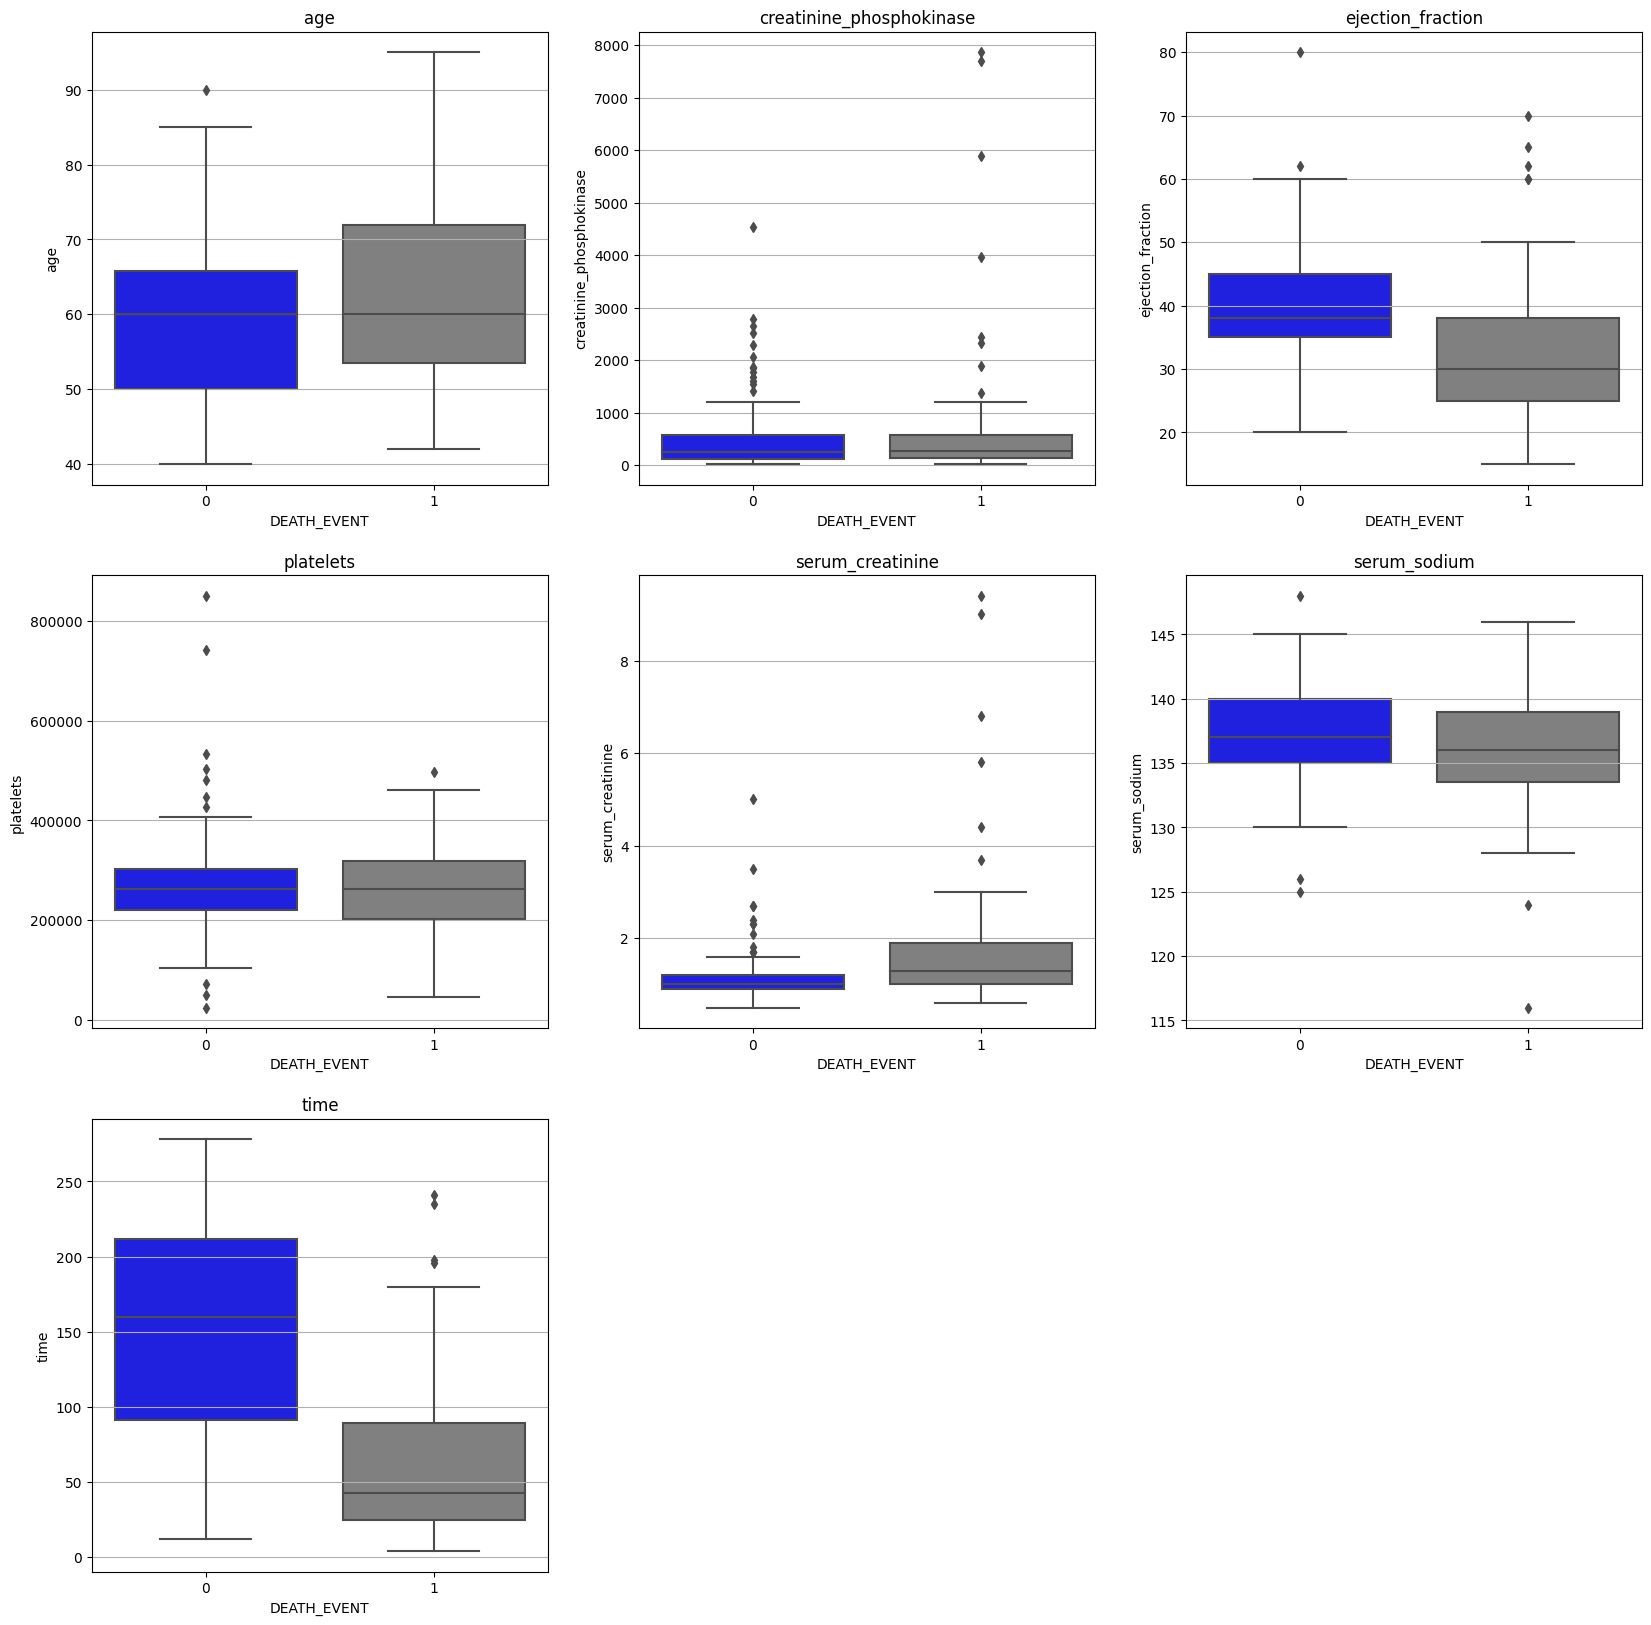

In [13]:
plt.figure(figsize = (20, 20))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.grid(True)
    plt.title(col)
    sns.boxplot(data = train_df, x = "DEATH_EVENT", y = col, palette = ["blue", "grey"])

<span style="color:crimson;font-size:22px"><b> Step 3: Data Preprocessing </b></span>
### 3.1 Handling Missing Values

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 186 to 112
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       209 non-null    float64
 1   anaemia                   209 non-null    int64  
 2   creatinine_phosphokinase  209 non-null    int64  
 3   diabetes                  209 non-null    int64  
 4   ejection_fraction         209 non-null    int64  
 5   high_blood_pressure       209 non-null    int64  
 6   platelets                 209 non-null    float64
 7   serum_creatinine          209 non-null    float64
 8   serum_sodium              209 non-null    int64  
 9   sex                       209 non-null    int64  
 10  smoking                   209 non-null    int64  
 11  time                      209 non-null    int64  
 12  DEATH_EVENT               209 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 22.9 KB


In [15]:
print("Number of missing values from training set is: ", train_df.isna().sum(), "/n")
print("Number of missing values from test set is: ", test_df.isna().sum())

Number of missing values from training set is:  age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64 /n
Number of missing values from test set is:  age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Comment:** There are no missing values in either the training or test sets so no imputation needs to be done.
### 3.2 Standardising the Numerical Features

We will standardise the features to be on roughly a similar scale to help the training process of the models. We will use StandardScaler over MinMaxScaler as StandardScaler is more robust to outliers.

In [16]:
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features)
    features = scaler.transform(features)
    df[col_names] = features
    return df

In [17]:
#X_train = Standard_Scaler(X_train, numerical_features)
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
186,50.0,0,582,0,50,0,153000.0,0.6,134,0,0,172
258,45.0,1,66,1,25,0,233000.0,0.8,135,1,0,230
104,60.0,0,53,0,50,1,286000.0,2.3,143,0,0,87
161,45.0,1,130,0,35,0,174000.0,0.8,139,1,1,121
263,68.0,1,157,1,60,0,208000.0,1.0,140,0,0,237


<span style="color:crimson;font-size:22px"><b> Step 4: Feature Selection </b></span>

<Axes: >

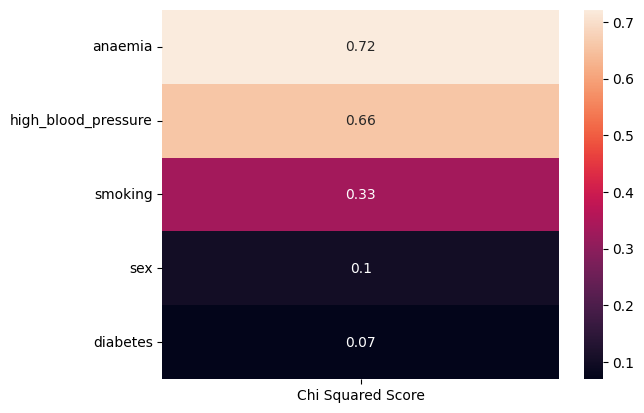

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = train_df.loc[:, categorical_features[:-1]]
target = train_df.loc[:, categorical_features[-1]]

best_features = SelectKBest(score_func = chi2, k = "all")
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ["Chi Squared Score"])

sns.heatmap(featureScores.sort_values(ascending = False, by = "Chi Squared Score"), annot = True)

<Axes: >

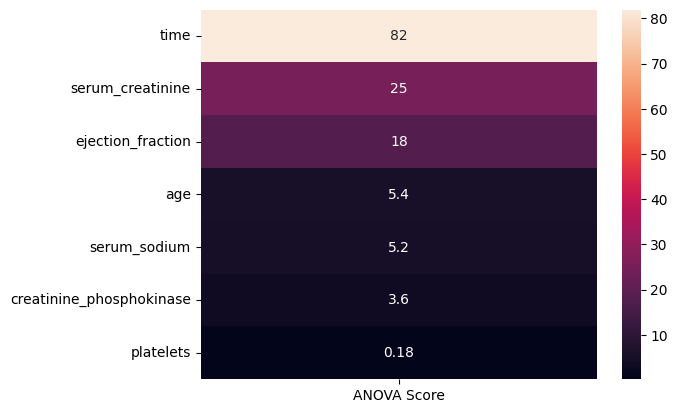

In [19]:
from sklearn.feature_selection import f_classif

features = train_df.loc[:, numerical_features]
target = train_df.loc[:, categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'), annot = True)

<span style="color:crimson;font-size:22px"><b> Step 4: Modelling </b></span>

### 4.1 Addressing Imbalanced Datasets with SMOTE

We use the SMOTE algorithm on the training set to make fake samples from the minority classes, and result in a more balanced training set. Otherwise, the imbalance in classes makes it difficult to compare accuracy scores amongst different classifiers.

In [20]:
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
X_train = X_train[["time", "serum_creatinine", "ejection_fraction"]]
X_test = X_test[["time", "serum_creatinine", "ejection_fraction"]]
sm = SMOTE(random_state = 42) 
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train.ravel()) 

### 4.2 Defining a function that fits the training data to the chosen classifier and returns a tuple of accuracy and cross validation scores

In [22]:
def model(classifier):
    classifier.fit(X_train_resampled, y_train_resampled)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 42)
    print(confusion_matrix(y_test, prediction))
    print(classification_report(y_test, prediction))
    return (classifier.score(X_train_resampled, y_train_resampled), 
            cross_val_score(classifier, X_train_resampled, y_train_resampled, cv = cv, scoring='roc_auc', n_jobs = -1).mean(), 
            f1_score(y_test, prediction))


In [23]:
#Creating empty lists for storing scores
training_accuracy_list = []
cross_validation_score_list = []
f1_score_list = []

#Initialising different classifiers with default hyperparameters
classifier_lr = LogisticRegression(random_state = 0, C=10, penalty= 'l2') 
classifier_svc = SVC(kernel = 'linear',C = 0.1)
classifier_dt = DecisionTreeClassifier(random_state = 1000, max_depth = 10, min_samples_leaf = 1)
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
classifier_rf = RandomForestClassifier(max_depth = 10,random_state = 0)

for c in [classifier_lr, classifier_svc, classifier_dt, classifier_knn, classifier_rf]:
    (training_acc_c, cross_val_score_c, f1_score_c) = model(c)
    training_accuracy_list.append(training_acc_c)
    cross_validation_score_list.append(cross_val_score_c)
    f1_score_list.append(f1_score_c)


model_scores = pd.DataFrame({"Model": ["Logistic Regression", "Support Vector Machine", "Decision Tree Classifier", "KNeighborsClassifier", "Random Forest"], 
                            "Training Accuracy": training_accuracy_list,
                            "Cross Validation Score": cross_validation_score_list,
                            "F1 Score": f1_score_list})
print(model_scores)

[[51 10]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        61
           1       0.67      0.69      0.68        29

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90

[[51 10]
 [10 19]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        61
           1       0.66      0.66      0.66        29

    accuracy                           0.78        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.78      0.78      0.78        90

[[51 10]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        61
           1       0.68      0.72      0.70        29

    accuracy                           0.80        90
   macro avg       0.77      0.78      0.77        90
weighted avg     

In [24]:
#Checking F1 scores
from sklearn.metrics import classification_report
